### Activation functions

In [19]:
import math
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6, 0.1)

Linear

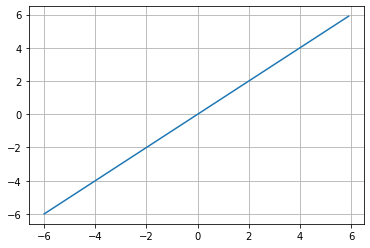

In [20]:
def linear(x):
    a = []
    for item in x:
        a.append(item)
    return a

y = linear(x)

plt.plot(x,y)
plt.grid()
plt.show()


Sigmoid

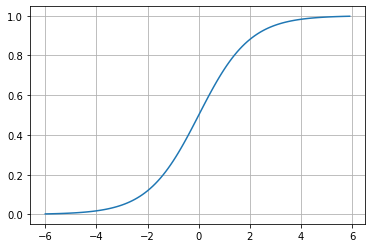

In [21]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

y = sigmoid(x)

plt.plot(x,y)
plt.grid()
plt.show()


Tahn

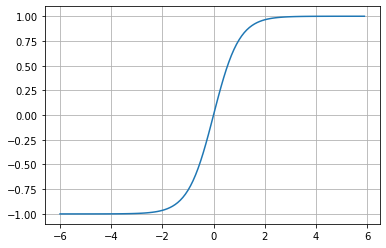

In [22]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)


y = tanh(x)

plt.plot(x,y)
plt.grid()
plt.show()

ReLU

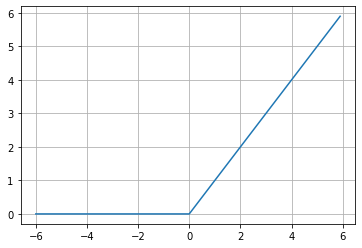

In [23]:
def relu(x):
    a = []
    for item in x:
        if item > 0:
            a.append(item)
        else:
            a.append(0)
    return a


y = relu(x)

plt.plot(x,y)
plt.grid()
plt.show()

### 3.4 Parametrización de los modelos

In [24]:
import keras
keras.__version__

'2.6.0'

In [25]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train = train_images.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

modelo base

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [28]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

batch_size = 50
num_classes = 10
epochs=10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 714us/step - loss: 0.5067 - accuracy: 0.8864
Test loss: 0.5066845417022705
Test accuracy: 0.8863999843597412


con función de activación ReLu

In [29]:
batch_size = 50
num_classes = 10
epochs=10

model2 = Sequential()
model2.add(Dense(10, activation='relu', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))


model2.summary()


model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model2.evaluate(x_test, y_test)

print('Model2 - Test loss:', test_loss)
print('Model2 - Test accuracy:', test_acc)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 698us/step - loss: 0.2763 - accuracy: 0.9200
Model2 - Test loss: 0.27626273036003113
Model2 - Test accuracy: 0.9200000166893005


con 512 nodos en capa intermedia

In [30]:
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
 
epochs = 10
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model3.evaluate(x_test, y_test)

print('Model3 - Test loss:', test_loss)
print('Model3 - Test accuracy:', test_acc)




Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 1ms/step - loss: 0.1864 - accuracy: 0.9482
Model3 - Test loss: 0.1863710880279541
Model3 - Test accuracy: 0.948199987411499


In [31]:
model3 = Sequential()
model3.add(Dense(1024, activation='relu', input_shape=(784,)))
model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
 
epochs = 10
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1
          )

test_loss, test_acc = model3.evaluate(x_test, y_test)

print('Model3 - Test loss:', test_loss)
print('Model3 - Test accuracy:', test_acc)




Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.7089 - accuracy: 0.8401
Epoch 2/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3583 - accuracy: 0.9036
Epoch 3/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3058 - accuracy: 0.9154
Epoch 4/10
1200/1200 [==============================] - 5s 5ms/step - loss: 0.2755 - accuracy: 0.9239
Epoch 5/10
1200/1200 [==============================] - 8s 7ms/step - loss: 0.2533 - accuracy: 0.9302


In [33]:
model3 = Sequential()
model3.add(Dense(1024, activation='relu', input_shape=(784,)))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
 
epochs = 10
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1
          )

test_loss, test_acc = model3.evaluate(x_test, y_test)

print('Model3 - Test loss:', test_loss)
print('Model3 - Test accuracy:', test_acc)




Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.6403 - accuracy: 0.8503
Epoch 2/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.2988 - accuracy: 0.9160
Epoch 3/10
1200/1200 [==============================] - 9s 7ms/step - loss: 0.2479 - accuracy: 0.9303
Epoch 4/10
1200/1200 [==============================] - 9s 7ms/st

In [34]:
predictions = model3.predict(x_test)

In [37]:
predictions[33].round(2)

array([0.06, 0.  , 0.  , 0.  , 0.67, 0.02, 0.25, 0.  , 0.  , 0.  ],
      dtype=float32)

In [38]:
y_test[33]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)